In [1]:
#!/usr/bin/python
import sys
import pickle
sys.path.append("../tools/")

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import pprint

# ref: https://github.com/Corvids/ud120-projects (includes all module 5 starter code)
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Load the Dataset and Initial Features

#### Question 1:

**Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]**

The goal of this project is to identify Enron Employees who may have committed fraud based on the available financial and email dataset using machine learning.

A major outlier in the dataset was the "Total" data point, which was removed, as seen in the following code.

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments',
                 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'other', 'long_term_incentive',
                 'restricted_stock', 'director_fees',
                 'to_messages', 'from_poi_to_this_person',
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

### Task 2: Understanding the Dataset and Question

In [4]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

if len(data_dict) > 0:
    print 'data loaded!'
    print 'Number of initial data points: ', len(data_dict)
    print 'Number of initial features used: ', len(features_list)

data loaded!
Number of initial data points:  146
Number of initial features used:  20


In [5]:
# get number of POI in data
poi_count = []
for key in data_dict.keys():
    poi_count.append(data_dict[key]['poi'])

print 'Number of POI: ', poi_count.count(1)
print 'Number of non-POI: ', poi_count.count(0)

Number of POI:  18
Number of non-POI:  128


In [6]:
print 'list of all people in the dataset: '
print data_dict.keys()

list of all people in the dataset: 
['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RIC

In [7]:
# get number of missing values per person
missing_feature = [0 for i in range(0, len(features_list))]
features_in_data = data_dict.values()

for loc_p, person in enumerate(features_in_data):
    for loc_f, feature in enumerate(features_list):
        if person[feature] == 'NaN':
            missing_feature[loc_f] += 1

In [8]:
print 'Number of missing from each feature: '
for feature, num_missing in zip(features_list, missing_feature):
    print feature, ' -- ', num_missing

Number of missing from each feature: 
poi  --  0
salary  --  51
deferral_payments  --  107
total_payments  --  21
loan_advances  --  142
bonus  --  64
restricted_stock_deferred  --  128
deferred_income  --  97
total_stock_value  --  20
expenses  --  51
exercised_stock_options  --  44
other  --  53
long_term_incentive  --  80
restricted_stock  --  36
director_fees  --  129
to_messages  --  60
from_poi_to_this_person  --  60
from_messages  --  60
from_this_person_to_poi  --  60
shared_receipt_with_poi  --  60


In [9]:
# print structure
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(data_dict["SKILLING JEFFREY K"])

{   'bonus': 5600000,
    'deferral_payments': 'NaN',
    'deferred_income': 'NaN',
    'director_fees': 'NaN',
    'email_address': 'jeff.skilling@enron.com',
    'exercised_stock_options': 19250000,
    'expenses': 29336,
    'from_messages': 108,
    'from_poi_to_this_person': 88,
    'from_this_person_to_poi': 30,
    'loan_advances': 'NaN',
    'long_term_incentive': 1920000,
    'other': 22122,
    'poi': True,
    'restricted_stock': 6843672,
    'restricted_stock_deferred': 'NaN',
    'salary': 1111258,
    'shared_receipt_with_poi': 2042,
    'to_messages': 3627,
    'total_payments': 8682716,
    'total_stock_value': 26093672}


##### Removing the outlier

In [10]:
import matplotlib.pyplot

%matplotlib inline

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

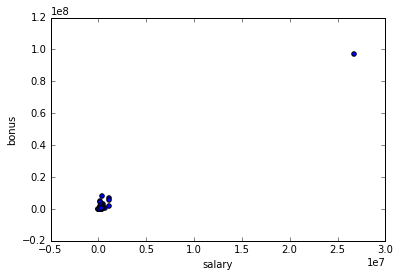

In [11]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [12]:
### Task 2: Remove outliers
##following outlier cleaner adapted
## from outliers mini-project

# remove total -- top right point separate from bottom left cluster
print 'Now removing outliers . . . '
print 'Removing point named "Total" from data...'
data_dict.pop('TOTAL')
print 'Number of data points after removal: ', len(data_dict)

Now removing outliers . . . 
Removing point named "Total" from data...
Number of data points after removal:  145


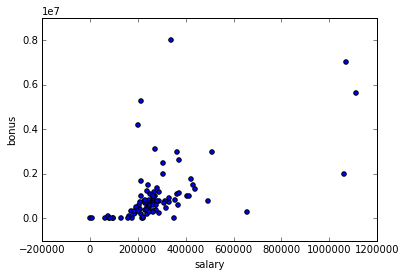

In [13]:
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

### Task 3: Optimize Feature Selection/Engineering

#### Question 2:

**What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]**

TBD

In [14]:
### Task 3: Create new feature(s)

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [15]:
for key in my_dataset:
    #messages to POI
    if my_dataset[key]['from_messages'] != 'NaN':
        my_dataset[key]['to_poi_message_ratio'] = \
                1.0*my_dataset[key]['from_this_person_to_poi']/my_dataset[key]['from_messages']
    else:
        my_dataset[key]['to_poi_message_ratio'] = 'NaN'
    #messages from POI
    if my_dataset[key]['to_messages'] != 'NaN':
        my_dataset[key]['from_poi_message_ratio'] = \
                1.0*my_dataset[key]['from_poi_to_this_person']/my_dataset[key]['to_messages']
    else:
        my_dataset[key]['from_poi_message_ratio'] = 'NaN'

In [16]:
# update the feature list
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments',
                 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'other', 'long_term_incentive',
                 'restricted_stock', 'director_fees',
                 'to_messages', 'from_poi_to_this_person',
                 'from_messages', 'from_this_person_to_poi',
                 'shared_receipt_with_poi',
                 'to_poi_message_ratio', 'from_poi_message_ratio']


In [17]:
pp.pprint(my_dataset["SKILLING JEFFREY K"])

{   'bonus': 5600000,
    'deferral_payments': 'NaN',
    'deferred_income': 'NaN',
    'director_fees': 'NaN',
    'email_address': 'jeff.skilling@enron.com',
    'exercised_stock_options': 19250000,
    'expenses': 29336,
    'from_messages': 108,
    'from_poi_message_ratio': 0.0242624758753791,
    'from_poi_to_this_person': 88,
    'from_this_person_to_poi': 30,
    'loan_advances': 'NaN',
    'long_term_incentive': 1920000,
    'other': 22122,
    'poi': True,
    'restricted_stock': 6843672,
    'restricted_stock_deferred': 'NaN',
    'salary': 1111258,
    'shared_receipt_with_poi': 2042,
    'to_messages': 3627,
    'to_poi_message_ratio': 0.2777777777777778,
    'total_payments': 8682716,
    'total_stock_value': 26093672}


In [18]:
if len(data_dict) > 0:
    print 'After adding two new features: to_poi_message_ratio, from_poi_message_ratio'
    print 'Number of initial data points: ', len(my_dataset)
    print 'Number of initial features used: ', len(features_list)

After adding two new features: to_poi_message_ratio, from_poi_message_ratio
Number of initial data points:  145
Number of initial features used:  22


##### Scaling our features

In [19]:
def scaleFeatures(my_dataset, feature):
    min_scale = np.inf
    max_scale = -np.inf
    
    for key in my_dataset:
        # get min, max
        if my_dataset[key][feature] == 'NaN':
            pass
        else:
            if my_dataset[key][feature] < min_scale:
                min_scale = my_dataset[key][feature]
            if my_dataset[key][feature] > max_scale:
                max_scale =  my_dataset[key][feature]
    
    print 'min ' + str(feature) + ' is: ' + str(min_scale)
    print 'max ' + str(feature) + ' is: ' + str(max_scale)
    
    for key in my_dataset:
        if my_dataset[key][feature] == 'NaN':
            pass
        else:
            my_dataset[key][feature] = 1.0*(my_dataset[key][feature] - min_scale) / (max_scale - min_scale)
    
    print 'scaled feature ' + str(feature) + '!'
    print '=========='

In [20]:
features_to_scale = ['bonus', 'salary', 'restricted_stock',
                     'long_term_incentive',
                     'restricted_stock_deferred', 'total_payments',
                    'total_stock_value', 'exercised_stock_options',
                    'expenses']

for feature in features_to_scale:
    scaleFeatures(my_dataset, feature)

min bonus is: 70000
max bonus is: 8000000
scaled feature bonus!
min salary is: 477
max salary is: 1111258
scaled feature salary!
min restricted_stock is: -2604490
max restricted_stock is: 14761694
scaled feature restricted_stock!
min long_term_incentive is: 69223
max long_term_incentive is: 5145434
scaled feature long_term_incentive!
min restricted_stock_deferred is: -1787380
max restricted_stock_deferred is: 15456290
scaled feature restricted_stock_deferred!
min total_payments is: 148
max total_payments is: 103559793
scaled feature total_payments!
min total_stock_value is: -44093
max total_stock_value is: 49110078
scaled feature total_stock_value!
min exercised_stock_options is: 3285
max exercised_stock_options is: 34348384
scaled feature exercised_stock_options!
min expenses is: 148
max expenses is: 228763
scaled feature expenses!


In [21]:
pp.pprint(my_dataset["SKILLING JEFFREY K"])

{   'bonus': 0.6973518284993695,
    'deferral_payments': 'NaN',
    'deferred_income': 'NaN',
    'director_fees': 'NaN',
    'email_address': 'jeff.skilling@enron.com',
    'exercised_stock_options': 0.5603918917223095,
    'expenses': 0.1276731623034359,
    'from_messages': 108,
    'from_poi_message_ratio': 0.0242624758753791,
    'from_poi_to_this_person': 88,
    'from_this_person_to_poi': 30,
    'loan_advances': 'NaN',
    'long_term_incentive': 0.3645981224972721,
    'other': 22122,
    'poi': True,
    'restricted_stock': 0.5440551591529837,
    'restricted_stock_deferred': 'NaN',
    'salary': 1.0,
    'shared_receipt_with_poi': 2042,
    'to_messages': 3627,
    'to_poi_message_ratio': 0.2777777777777778,
    'total_payments': 0.08384122985357859,
    'total_stock_value': 0.5317507033126446}


In [22]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

##### Feature Selection

In [23]:
from sklearn.cross_validation import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [24]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state = 42)
clf = clf.fit(features_train, labels_train)

features_importance = zip(map(lambda x: round(x, 6), clf.feature_importances_), features_list)
features_importance.sort(key = lambda t: t[0], reverse = True)

print 'feature importances: ', features_importance

feature importances:  [(0.23849, 'total_stock_value'), (0.220427, 'loan_advances'), (0.168174, 'long_term_incentive'), (0.136189, 'restricted_stock_deferred'), (0.087254, 'shared_receipt_with_poi'), (0.075786, 'salary'), (0.073681, 'other'), (0.0, 'poi'), (0.0, 'deferral_payments'), (0.0, 'total_payments'), (0.0, 'bonus'), (0.0, 'deferred_income'), (0.0, 'expenses'), (0.0, 'exercised_stock_options'), (0.0, 'restricted_stock'), (0.0, 'director_fees'), (0.0, 'to_messages'), (0.0, 'from_poi_to_this_person'), (0.0, 'from_messages'), (0.0, 'from_this_person_to_poi'), (0.0, 'to_poi_message_ratio')]


In [25]:
n_most = features_importance[0:22] # all points with feature importance > 0.0

selected_features = [x[1] for x in n_most]
print selected_features

['total_stock_value', 'loan_advances', 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'salary', 'other', 'poi', 'deferral_payments', 'total_payments', 'bonus', 'deferred_income', 'expenses', 'exercised_stock_options', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'to_poi_message_ratio']


### Task 4: Pick and Tune an Algorithm

#### Question 3:

**What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]**

TBD

In [26]:
from sklearn.cross_validation import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [80]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html


# Provided to give you a starting point. Try a variety of classifiers.

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import time

clf_GNB = GaussianNB()

t0_GNB = time()
clf_GNB.fit(features_train, labels_train)
print "training time:", round(time()-t0_GNB, 3), "s"

t1_GNB = time()
pred_GNB = clf_GNB.predict(features_test)
print "predicting time:", round(time()-t1_GNB, 3), "s"

accuracy_GNB = accuracy_score(labels_test, pred_GNB)
print 'accuracy of Naive Bayes: ' + str(accuracy_GNB)
print '\n'
test_classifier(clf_GNB, my_dataset, features_list, folds = 1000)

training time: 0.002 s
predicting time: 0.001 s
accuracy of Naive Bayes: 0.909090909091


GaussianNB()
	Accuracy: 0.75613	Precision: 0.14603	Recall: 0.17100	F1: 0.15753	F2: 0.16535
	Total predictions: 15000	True positives:  342	False positives: 2000	False negatives: 1658	True negatives: 11000



In [83]:
# Decision Tree

from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(random_state=42)

t0_tree = time()
clf_tree.fit(features_train, labels_train)
print "training time:", round(time()-t0_tree, 3), "s"

t1_tree = time()
pred_tree = clf_tree.predict(features_test)
print "predicting time:", round(time()-t1_tree, 3), "s"

accuracy_tree = accuracy_score(labels_test, pred_tree)
print 'accuracy of Decision Tree: ' + str(accuracy_tree)
print '\n'
test_classifier(clf_tree, my_dataset, features_list, folds = 1000)

training time: 0.001 s
predicting time: 0.0 s
accuracy of Decision Tree: 0.818181818182


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
	Accuracy: 0.81753	Precision: 0.31073	Recall: 0.30250	F1: 0.30656	F2: 0.30411
	Total predictions: 15000	True positives:  605	False positives: 1342	False negatives: 1395	True negatives: 11658



In [81]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier

clf_Ada = AdaBoostClassifier(random_state=42)

t0_Ada = time()
clf_Ada.fit(features_train, labels_train)
print "training time:", round(time()-t0_Ada, 3), "s"

t1_Ada = time()
pred_Ada = clf_Ada.predict(features_test)
print "predicting time:", round(time()-t1_Ada, 3), "s"

accuracy_Ada = accuracy_score(labels_test, pred_Ada)
print 'accuracy of Ada Boost: ' + str(accuracy_Ada)
print '\n'
test_classifier(clf_Ada, my_dataset, features_list, folds = 1000)

training time: 0.112 s
predicting time: 0.004 s
accuracy of Ada Boost: 0.75


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
	Accuracy: 0.84380	Precision: 0.38635	Recall: 0.29150	F1: 0.33229	F2: 0.30655
	Total predictions: 15000	True positives:  583	False positives:  926	False negatives: 1417	True negatives: 12074



In [87]:
# pipeline -- PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [('reduce_dim', PCA()), ('svm', SVC(random_state=42))]
clf_pipe = Pipeline(estimators)

t0_pipe = time()
clf_pipe.fit(features_train, labels_train)
print "training time:", round(time()-t0_pipe, 3), "s"

t1_pipe = time()
pred_pipe = clf_pipe.predict(features_test)
print "predicting time:", round(time()-t1_pipe, 3), "s"

accuracy_pipe = accuracy_score(labels_test, pred_pipe)
print 'accuracy of pipeline: ' + str(accuracy_pipe)

print '\n'
test_classifier(clf_pipe, my_dataset, features_list, folds = 1000)



Got a divide by zero when trying out: Pipeline(steps=[('reduce_dim', PCA(copy=True, n_components=None, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])
Precision or recall may be undefined due to a lack of true positive predicitons.


### Task 5

#### Question 4:

**What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize param**

In [65]:
tree.DecisionTreeClassifier().get_params().keys()

['presort',
 'splitter',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'max_features',
 'max_depth',
 'class_weight']

In [91]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

from tester import test_classifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn import grid_search
from sklearn.metrics import make_scorer

cv_sets = StratifiedShuffleSplit(labels_train, n_iter = 10, test_size = 0.333, random_state = 42)
parameters = {'max_depth':[1,2,3,4,5]} 
scoring_fnc = make_scorer( test_classifier )
regressor = tree.DecisionTreeClassifier()

grid = grid_search.GridSearchCV(regressor, parameters, cv=cv_sets)


t0 = time()
clf = clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(labels_test, pred)
print 'accuracy of tuned Decision Tree model: ' + str(accuracy)

print '\n'
test_classifier(grid, my_dataset, features_list, folds = 1000)

training time: 0.001 s
predicting time: 0.001 s
accuracy of tuned Decision Tree model: 0.909090909091


GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=10, test_size=0.333, random_state=42),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)
	Accuracy: 0.83780	Precision: 0.20464	Recall: 0.07500	F1: 0.10977	F2: 0.08588
	Total predictions: 15000	True positives:  150	False positives:  583	False negatives: 1850	True negatives: 12417



#### Question 5:

**What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric item: “validation strategy”]**

In [ ]:
from tester import test_classifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search

cv_sets = StratifiedShuffleSplit(labels, n_iter = 10, test_size = 0.20, random_state = 42)
regressor = DecisionTreeRegressor(random_state = 42)
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]} 

grid = grid_search.GridSearchCV(regressor, param_grid=params, cv=cv_sets)

#grid = grid.fit(features, labels)

test_classifier(grid, my_dataset, features_list, folds = 1000)

In [ ]:
from sklearn import grid_search
from sklearn.metrics import make_scorer, f1_score
from sklearn import cross_validation


parameters = {'kernel':['linear', 'rbf'], 'C':[1,2,3], 'gamma':[0.0]}

# our chosen classifier
clf = svm.SVC(random_state = 42)

f1_scorer = make_scorer(f1_score, pos_label='yes')
grid_obj = grid_search.GridSearchCV(clf, parameters, scoring=f1_scorer)

grid_obj = grid_obj.fit(features_train, labels_train)
clf = grid_obj.best_estimator_

# final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, features_train, labels_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, features_test, labels_test))

#### Question 6:

**Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]**

### Task 6

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)